[referece](https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817)

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# plt.rcParams['figure.figsize'] = []

In [42]:
x_train = np.arange(0, 1001, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_train = 2*x_train + 1
# y_train = 0.5*x_train

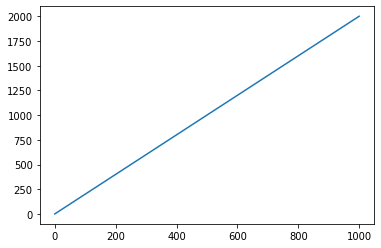

In [43]:
plt.plot(x_train, y_train)

In [44]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(x_train.reshape(-1,1))
scaler_y.fit(y_train.reshape(-1,1))
x_train = scaler_x.transform(x_train.reshape(-1, 1))
y_train = scaler_y.transform(y_train.reshape(-1, 1))

In [45]:
import torch 
from torch.autograd import Variable

class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_size=10) -> None:
        super(LinearRegression, self).__init__()
        self.linear1 = torch.nn.Linear(input_dim, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)
        self.linear = torch.nn.Linear(input_size, output_size)
        
    def forward(self, x):
        # y = torch.nn.functional.relu(self.linear1(x))
        # y = self.linear2(y)

        y = self.linear(x)
        return y

In [46]:
input_dim = x_train.shape[1]
output_dim = 1
learning_rate = 0.02
epochs = 100

model = LinearRegression(input_dim, output_dim)

### FOR GPU ###
if torch.cuda.is_available():
    model.cuda()

In [47]:
# set loss
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters())

In [48]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradient buffers
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    # get the loss
    loss = criterion(outputs, labels)
    print(loss)
    
    # get gradients w.r.t to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print(f'epoch {epoch}, loss {loss.item()}')

tensor(0.4285, grad_fn=<MseLossBackward0>)
epoch 0, loss 0.42848333716392517
tensor(0.3865, grad_fn=<MseLossBackward0>)
epoch 1, loss 0.386474609375
tensor(0.3486, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.34861618280410767
tensor(0.3145, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.31449785828590393
tensor(0.2837, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.2837499976158142
tensor(0.2560, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.25603944063186646
tensor(0.2311, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.2310660183429718
tensor(0.2086, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.20855921506881714
tensor(0.1883, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.18827518820762634
tensor(0.1700, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.16999433934688568
tensor(0.1535, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.15351860225200653
tensor(0.1387, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.13866958022117615
tensor(0.1253, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.1252865195274353
tens

[[-0.08821916]
 [-0.08706108]
 [-0.08590301]
 ...
 [ 1.0675378 ]
 [ 1.0686959 ]
 [ 1.0698539 ]]


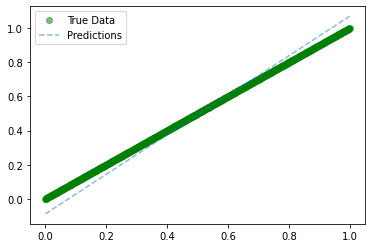

In [49]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)
    
plt.clf()
plt.plot(x_train, y_train, 'go', label="True Data", alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
# plt.plot(scaler_x.inverse_transform(x_train), scaler_y.inverse_transform(y_train), 'go', label="True Data", alpha=0.5)
# plt.plot(scaler_x.inverse_transform(x_train), scaler_y.inverse_transform(predicted), '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [50]:
for param in model.parameters():
    print(param.data)

tensor([[ 0.7484],
        [-0.6073],
        [-0.6569],
        [-0.5755],
        [-0.6414],
        [ 0.4598],
        [-0.3978],
        [ 0.0468],
        [ 0.9505],
        [ 0.1657]])
tensor([ 0.6016,  0.2065,  0.6468,  0.0298, -0.7483,  0.5339, -0.0179,  0.6489,
        -0.6598,  0.1480])
tensor([[-0.1029, -0.0402,  0.0790, -0.2815, -0.1129,  0.0327, -0.1504, -0.1305,
          0.0168,  0.0809]])
tensor([0.1592])
tensor([[1.1581]])
tensor([-0.0882])
